In [5]:
import polars as pl
import numpy as np
bio = pl.read_csv("lahman_people.csv")
pbp = pl.read_csv("savant_data_2021_2023.csv")
pbp

pitch_type,game_date,release_speed,release_pos_x,release_pos_z,batter,pitcher,events,description,zone,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,sv_id,vx0,vy0,…,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,role_key,sp_indicator,rp_indicator,pitch_number_appearance,pitcher_at_bat_number,times_faced
str,str,f64,f64,f64,str,str,str,str,i64,str,str,str,str,str,str,i64,str,i64,i64,i64,f64,f64,f64,f64,str,str,str,i64,i64,str,f64,f64,str,str,f64,f64,…,str,str,str,str,str,str,str,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,str,str,i64,f64,f64,str,i64,i64,i64,i64,i64
"""FF""","""2021-04-05""",93.2,0.84,5.74,"""c7c83eaa9fe8da2f81c5fce172059a…","""4f902241478a103f7a818f5be9a7b7…","""strikeout""","""swinging_strike""",13,"""R""","""L""","""L""","""e58e9c0fd276f0c175345b6d952a9e…","""ae2caea4bb1f46b714e35f0176994f…","""S""",2,null,3,2,2021,0.43,1.57,-0.05,1.41,null,null,null,2,6,"""Bot""",null,null,"""55bd3201fa7465188c2c70169f2e94…",null,-3.263176,-135.5206,…,"""c04bfbc3f42ec36472468471b3a716…","""7694076619c298b4556297b20afaf8…","""17cbce1de7a9d4e31952e86ba69ced…","""b135b247f1afd053b201fc7c434493…","""fa9c99ce9acb5fd5971e8fb834d745…","""53dfe414229803162d14787d30fbf4…","""9b52235d7b694738421b6c2ed9271e…",53.47,null,null,0.0,1,0,0,null,47,7,"""4-Seam Fastball""",0,2,0,2,2,0,0,2,"""Infield shift""","""Standard""",166,-0.014,-0.134,"""SP""",1,0,97,22,3
"""SL""","""2021-04-05""",82.9,1.03,5.69,"""c7c83eaa9fe8da2f81c5fce172059a…","""4f902241478a103f7a818f5be9a7b7…",null,"""foul""",5,"""R""","""L""","""L""","""e58e9c0fd276f0c175345b6d952a9e…","""ae2caea4bb1f46b714e35f0176994f…","""S""",null,null,3,2,2021,-0.42,-0.34,0.09,2.24,null,null,null,2,6,"""Bot""",null,null,"""55bd3201fa7465188c2c70169f2e94…",null,-1.343797,-120.739091,…,"""c04bfbc3f42ec36472468471b3a716…","""7694076619c298b4556297b20afaf8…","""17cbce1de7a9d4e31952e86ba69ced…","""b135b247f1afd053b201fc7c434493…","""fa9c99ce9acb5fd5971e8fb834d745…","""53dfe414229803162d14787d30fbf4…","""9b52235d7b694738421b6c2ed9271e…",53.66,null,null,null,null,null,null,null,47,6,"""Slider""",0,2,0,2,2,0,0,2,"""Infield shift""","""Standard""",309,0.0,0.0,"""SP""",1,0,96,22,3
"""FF""","""2021-04-05""",94.6,-1.85,5.77,"""514eeb6e6c17085fc1adabf03f1adc…","""afb9b85defc6fe5c3f48681480eff4…","""caught_stealing_3b""","""ball""",14,"""R""","""R""","""R""","""3c4ec083bb4b200556718068a3cea7…","""284da2e9c8943a9faa155f56f0faaa…","""B""",2,null,2,2,2021,-0.56,1.53,2.01,1.92,null,"""c8f1ff43c331519aab03daab36b84b…",null,2,4,"""Top""",null,null,"""3103eeddc91e18c223c7ef4d3c12f2…",null,11.292119,-137.173707,…,"""a9b53974ac34cd7c03133051645ef4…","""c3b12c33078b6ce2f0c8287913cd68…","""88a241e142df6a547f9188eb81f5c2…","""c1efd3145c820257fae2347ff56758…","""4f6c643961e8df8f6d76d136b13ba2…","""a7ab335ba29a72bc194f77b694f23b…","""ccbeebb83e2f368d70aca48df9d3ca…",54.12,null,null,0.0,0,0,0,null,28,6,"""4-Seam Fastball""",0,4,4,0,4,0,4,0,"""Standard""","""Standard""",220,0.014,-0.202,"""SP""",1,0,95,19,3
"""FF""","""2021-04-05""",97.1,1.86,6.57,"""875eeca87c6f80182a88c2a7b92c04…","""0f061b9439845159c394a71e55d635…","""field_out""","""hit_into_play""",13,"""R""","""R""","""L""","""8499d67c7ea3ce9671a0574ff23364…","""febb17c5596d048b6a6a4eea23cfe0…","""X""",7,"""line_drive""",3,2,2021,0.75,1.56,-0.84,2.21,null,null,"""29df9634e71f12ec4754b370e647db…",2,5,"""Bot""",90.32,88.66,"""c4db34402ba417ae6cc0cf8eca1c05…",null,-8.928735,-140.780154,…,"""80f3a94c7bf1ed6397

In [6]:
def get_counts(data, type):#janky way to do this?
    """
    Gets count of playing time
    data - df of interest
    type - whether batter or pitcher
    """
    return (data
            .group_by(type,'game_pk', 'at_bat_number', 'game_year')
            .len().group_by(type, 'game_year').len()
            .rename({"len":"PA"}).pivot('game_year', index = type, values = 'PA'))
batterAB = pbp.pipe(get_counts, 'batter').select("batter", "2021", "2022", "2023")
pitcherBF = pbp.pipe(get_counts, 'pitcher').select("pitcher", "2021", "2022", "2023")
batterAB

batter,2021,2022,2023
str,u32,u32,u32
"""48d883c25f0433e83a4f1e6c3b075f…",null,18,53
"""211afb16159815485e4edaf53f202f…",343,304,450
"""d76343ee3f53822094953cf05d53c4…",2,null,null
"""c17f6680b24e0e7306ccc02beb858c…",545,276,228
"""1aa97033b20b51d4e32c2c8fcdbad5…",null,83,105
…,…,…,…
"""aa3d79f358afbee1f5c09c94dbabe1…",2,null,null
"""6dd582f3298133f1940215ba26611b…",1,null,null
"""3ffca17a704b2bdd7b912cacb3c528…",5,null,null


In [72]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import root_mean_squared_error
#running linear regression of past 2 seasons to apply to 2023 - about as good as expected(pretty bad)
def test_model_sklearn(model, data, x, y):
    if isinstance(data, pl.DataFrame):
        X_train, X_test, y_train, y_test = train_test_split(data.select(x), data.select(y), test_size = 0.25, random_state = 42) 
    else:
        X_train, X_test, y_train, y_test = train_test_split(data[x], data[y], test_size = 0.25, random_state = 42) 
    #use random_state=42!!
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) 
    return root_mean_squared_error(y_pred, y_test)
test_model_sklearn(LinearRegression(), batterAB.fill_null(0), ['2022', '2021'], ['2023']), test_model_sklearn(LinearRegression(), pitcherBF.fill_null(0), ['2022', '2021'], ['2023'])
#similar to averaging method - expected due to nature of MLR 
#baseline to beat: batter: 130.2384341194738, pitcher:145.577135969748

(125.27682200717776, 140.7960250372423)

In [8]:
def get_means(data):
    #using average of 2022, 2021 data to estimate 2023 data
    return (data.with_columns(pl.mean_horizontal(['2022', '2021'])
                                    .alias('row_mean')).fill_null(0)
                                    .select(['2023', 'row_mean']))
batter_test, batter_mean = batterAB.pipe(get_means)
pitcher_test, pitcher_mean = pitcherBF.pipe(get_means)
root_mean_squared_error(batter_test, batter_mean), root_mean_squared_error(pitcher_test, pitcher_mean)
#mean method: 178.68480531577185, 175.54575174805603 - about same as MLR method

(147.7921639050094, 168.31630176648687)

In [9]:
#need to predict nulls - looking at MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
def imputeData(estimator, batterdf, pitcherdf, max_iter = 200, random_state = 42):
    imputer = IterativeImputer(estimator = estimator, max_iter=max_iter, random_state=random_state)
    batterABimputed = (pl.DataFrame(imputer.fit_transform(
        batterdf.select("2023", "2022", "2021")), schema = ["2023", "2022", "2021"]).with_columns(
            batter = batterAB.get_column("batter")
    ))
    pitcherBFimputed = (pl.DataFrame(imputer.fit_transform(
        pitcherdf.select("2023", "2022", "2021")), schema = ["2023", "2022", "2021"]).with_columns(
            pitcher = pitcherBF.get_column("pitcher")
    ))
    return batterABimputed, pitcherBFimputed
batterimp, pitcherimp = imputeData(BayesianRidge(), batterAB, pitcherBF)#Bayesian Seems Best - actually converges
#batterimp, pitcherimp = imputeData(DecisionTreeRegressor(), batterAB, pitcherBF, max_iter = 2000)
#batterimp, pitcherimp = imputeData(KNeighborsRegressor(), batterAB, pitcherBF, max_iter = 2000)
test_model_sklearn(LinearRegression(), batterimp, ['2022', '2021'], ['2023']), test_model_sklearn(LinearRegression(), pitcherimp, ['2022', '2021'], ['2023'])
#MLR with imputation yields - batter: 108.16645006899171, pitcher: 104.5259354514329
#imputation seems better than just filling with 0


(104.33923969785363, 105.62567934445568)

In [10]:
import datetime
import polars_xdt as xdt
bio
#months in league to standardize? vs. age
openingMonths = {
    year : datetime.date(year, 10, 1) for year in range(2021, 2024)
}
bio = (
    bio
    .lazy()
    .with_columns(
        pl.col("birthDate").str.to_date("%Y-%m-%d").alias("birthDT"),
        pl.col("debut").str.to_date("%Y-%m-%d").alias("debutDT"),
        
    )
    .collect()
)
def monthDelta(start, end):
    return (pl.date_ranges(start, end,'1mo',closed='right')).list.len()
monthdata = (
    bio
    .with_columns(
        monthDelta(pl.col("birthDT"),openingMonths[2021]).alias("Age2021"),
        monthDelta(pl.col("birthDT"),openingMonths[2022]).alias("Age2022"),
        monthDelta(pl.col("birthDT"),openingMonths[2023]).alias("Age2023"),
        monthDelta(pl.col("debutDT"),openingMonths[2021]).alias("TIL2021"),
        monthDelta(pl.col("debutDT"),openingMonths[2022]).alias("TIL2022"),
        monthDelta(pl.col("debutDT"),openingMonths[2023]).alias("TIL2023"),
    ) 
).select("player_mlb_id", "playerID_LAHMAN", pl.col("^[Age | TIL].*$"))
#openingMonths
monthdata.filter(pl.col("Age2021") < 240)#age has no relation?

player_mlb_id,playerID_LAHMAN,Age2021,Age2022,Age2023,TIL2021,TIL2022,TIL2023
str,str,u32,u32,u32,u32,u32,u32
"""f4d4a36c6b6648bef8169a02830966…","""4106802376d008396991ce7f923a8f…",238,250,262,0,0,12
"""19a9cdf36a658385d6e860ca223774…","""16d0a56a7181da6d9f843aea9a46b8…",232,244,256,0,0,6
"""67b79a0eb19c2ee23b9f1c4c619fc3…","""39f3e944f558c684f200c34e340fa3…",221,233,245,0,0,4
"""0d3fd6094040544c67274fea9f5025…","""2d95e28bb6527a26e497695378b241…",226,238,250,0,0,3
"""faebeb39afd5dd26f5afd5cef11d57…","""c874f39530efa58cb66c8edf089e71…",236,248,260,0,0,3
…,…,…,…,…,…,…,…
"""f4fa3601ae6114338493300f8e04ac…","""e2a077bcdacc2ad8178e786e19088d…",230,242,254,0,0,0
"""522732ffbe0234d4237e4d269207ed…","""43d73e08266ecc9fb9ca8617a58b60…",229,241,253,0,0,0
"""dcbd880cb90b63d48076b51692bc81…","""a7298b21437ece63a5333623129b12…",234,246,258,0,0,0


In [11]:
#this is a silly way to do this...
batterzeros = batterAB.fill_null(0)
pitcherzeros = pitcherBF.fill_null(0)
batterData = batterzeros.join(monthdata, left_on = "batter", right_on = "player_mlb_id")
pitcherData = pitcherzeros.join(monthdata, left_on = "pitcher", right_on = "player_mlb_id")
def convertTimeSeries(data, type):
    PlayingTime = pl.concat(
        [
            data.get_column('2021'),
            data.get_column('2022'),
            data.get_column('2023')
        ],
        how='vertical'
    )
    age = pl.concat(
        [
            data.get_column('Age2021'),
            data.get_column('Age2022'),
            data.get_column('Age2023')
        ],
        how='vertical'
    )

    experience = pl.concat(
        [
            data.get_column('TIL2021'),
            data.get_column('TIL2022'),
            data.get_column('TIL2023')
        ],
        how='vertical'
    )
    season = pl.concat(
        [
            pl.Series([2021] * int(experience.len() / 3)).alias("year"),
            pl.Series([2022] * int(experience.len() / 3)),
            pl.Series([2023] * int(experience.len() / 3)),
        ],
        how = 'vertical'
    )
    players = pl.concat(
        [
            data.get_column(type),
            data.get_column(type),
            data.get_column(type)
        ],
        how='vertical'
    )
    timeseries = pl.DataFrame([players, season, age, experience, PlayingTime]).rename({"Age2021": "Age", "TIL2021": "TIL", "2021": "PlayingTime"})
    return timeseries
pitcherTS = convertTimeSeries(pitcherData, "pitcher")
batterTS = convertTimeSeries(batterData, "batter")

In [12]:
wobas = (pbp.filter(pl.col("woba_value").is_not_null())
 .group_by("batter", "game_year")
 .mean().select("batter", "game_year", "estimated_woba_using_speedangle")).with_columns(
     (pl.col("game_year") + 1).alias("next_year")
 ).rename({"estimated_woba_using_speedangle": "seasonWOBA"})
wobas

batter,game_year,seasonWOBA,next_year
str,i64,f64,i64
"""d636652206acb1f885b4b81be07fb4…",2021,null,2022
"""d4042704e76613cb259ac13d7db3fb…",2023,0.425,2024
"""b7d7b9482bbf4aa2ab584f7ca51575…",2021,0.1906,2022
"""8fe5068677f925b38c5c2fd0db4d9d…",2021,0.340333,2022
"""78576937fe7d731544ca5bd0f668e5…",2021,0.057,2022
…,…,…,…
"""5c473a89276efe87cf2f62aa3b211f…",2023,0.482182,2024
"""2dd6abc1ed2c2ed1b7ed35bb26e957…",2021,0.478376,2022
"""dc3388cd406e42cc389f1efb4b2031…",2023,0.351998,2024


In [13]:
#sample_batter = wobas.select(pl.first('batter')).item()#this is really unintuitive?
batterdata = pbp.with_columns(
        #pl.col("estimated_woba_using_speedangle").fill_null(pl.col("woba_value")).alias("xwoba")
        pl.col("woba_value").alias("xwoba")
    )
batterdata.select("xwoba", "estimated_woba_using_speedangle", "woba_value", "batter").filter(pl.col("batter").str.starts_with("bcfe3b7e6b498b243aa5c5ddcb81d5"))

xwoba,estimated_woba_using_speedangle,woba_value,batter
f64,f64,f64,str
0.0,null,0.0,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
null,null,null,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
null,null,null,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
null,null,null,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
null,null,null,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
null,null,null,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
0.0,null,0.0,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
null,null,null,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"
null,null,null,"""bcfe3b7e6b498b243aa5c5ddcb81d5…"


In [14]:
def RegressToMean(data, pbp):
    WOBApopMeans = {year : data.filter(pl.col("game_year") == year).get_column("seasonWOBA").mean() for year in range(2021, 2024) }
    batterdata = pbp.with_columns(
        pl.col("estimated_woba_using_speedangle").fill_null(pl.col("woba_value")).alias("xwoba")
    )
    batterdata = batterdata.filter((pl.col("xwoba").is_not_null())).group_by("batter", "game_year").agg([
            pl.col("xwoba").mean().alias("woba_mean"),
            pl.col("xwoba").var().alias("woba_varPerformance"),
            pl.col("xwoba").len().alias("PT")
        ])
    def popvar(year):
        yearbatter = batterdata.filter(pl.col("game_year") == year)
        tolerance = 0.00001
        diff = 1000
        var = -20
        while(diff > tolerance):
            #iterate until convergance
            #this is a janky way to do this - surely there is a way for polars to resolve columns?
            varbatters = yearbatter.with_columns(
                ((pl.col("woba_mean") - WOBApopMeans[year])**2 - pl.col("woba_varPerformance") / pl.col("PT")).alias("woba_varTalent")
            )

            varbatters = varbatters.with_columns(
                ((var + pl.col("woba_varTalent") / pl.col("PT"))**2).alias("sum(popvar,noisevar)"))
            
            varbatters = varbatters.with_columns(
                (pl.col("woba_varPerformance") / pl.col("sum(popvar,noisevar)")).alias("numerator"),
                (1 / pl.col("sum(popvar,noisevar)")).alias("denominator"),
            )
            new_var = varbatters.get_column("numerator").sum() / varbatters.get_column("denominator").sum()
            diff = abs(new_var - var)
            var = new_var
        return var
    popvars = {year : popvar(year) for year in range(2021, 2024)}
    batterdata = batterdata.with_columns(
        pl.when((pl.col('woba_varPerformance') == 0 )|( pl.col("woba_varPerformance").is_null()))
            .then(pl.col("game_year").replace_strict(popvars)).otherwise(pl.col('woba_varPerformance')).alias("woba_varPerformance")

    )
    batterdata = batterdata.with_columns(#is there a weighted average method for polars?
        ((pl.col("PT")) / pl.col("woba_varPerformance")).alias("noiseWeight"),
        (100 / pl.col("game_year").replace_strict(popvars)).alias("popWeight")
    )
    batterdata = batterdata.with_columns(
        (((pl.col("noiseWeight") * pl.col("woba_mean")) + (pl.col("popWeight") * pl.col("game_year").replace_strict(WOBApopMeans)))
          / (pl.col("noiseWeight") + pl.col("popWeight"))).alias("RegressedWOBA"),
        (pl.col("game_year").replace_strict(WOBApopMeans)).alias("PopWOBAMean"),
        (pl.col("game_year").replace_strict(popvars)).alias("PopVar"),
        (pl.col("game_year") + 1).alias("next_year")
    )
    print(popvars)
    return batterdata#.select("batter", "game_year", "woba_mean", "RegressedWOBA", "PT")
regressedWOBA = RegressToMean(wobas, pbp)

{2021: 0.12443189556382928, 2022: 0.12397197582290374, 2023: 0.13646756826133813}


In [15]:
regressedWOBA

batter,game_year,woba_mean,woba_varPerformance,PT,noiseWeight,popWeight,RegressedWOBA,PopWOBAMean,PopVar,next_year
str,i64,f64,f64,u32,f64,f64,f64,f64,f64,i64
"""7e717ca62155014bc93e32d418f96d…",2023,0.188571,0.074191,56,754.812472,732.774836,0.27137,0.356658,0.136468,2024
"""b0ca73a5ca175315fc896841cd462f…",2023,0.215385,0.060043,13,216.510575,732.774836,0.324437,0.356658,0.136468,2024
"""7e2ea9a1e09ecedbb82fa041fa50fa…",2023,0.344806,0.153282,408,2661.761798,732.774836,0.347365,0.356658,0.136468,2024
"""b0c52bd50d2f39a827d327d14ec0dd…",2021,0.398247,0.204493,677,3310.623948,803.652468,0.381951,0.314823,0.124432,2022
"""2923b2767d40064620b34fd192dd7a…",2022,0.224685,0.070327,54,767.840696,806.633913,0.28397,0.340404,0.123972,2023
…,…,…,…,…,…,…,…,…,…,…
"""35941e56cf0ad1cf4d0ad279953b6f…",2023,0.353941,0.113314,370,3265.27159,732.774836,0.354439,0.356658,0.136468,2024
"""ea68a8dfc2af432fa9995659df2e1b…",2022,0.287978,0.111208,314,2823.529208,806.633913,0.299627,0.340404,0.123972,2023
"""ed725965760ec8e92fe31753b3e7d1…",2023,0.1245,0.011398,4,350.949025,732.774836,0.281477,0.356658,0.136468,2024


In [16]:
nextyearWOBA = batterTS.join(regressedWOBA, left_on = ["batter","year"], right_on = ["batter", "next_year"])
currentWOBA = batterTS.join(regressedWOBA, left_on = ["batter","year"], right_on = ["batter", "game_year"])


In [17]:
currentWOBA

batter,year,Age,TIL,PlayingTime,woba_mean,woba_varPerformance,PT,noiseWeight,popWeight,RegressedWOBA,PopWOBAMean,PopVar,next_year
str,i64,u32,u32,u32,f64,f64,u32,f64,f64,f64,f64,f64,i64
"""33438ca2fdf93ff73b2e1bcc5da305…",2021,312,3,3,0.124,0.015376,3,195.109261,803.652468,0.277546,0.314823,0.124432,2022
"""80f3a94c7bf1ed6397017744dbb75f…",2021,416,90,657,0.354866,0.172174,656,3810.105566,803.652468,0.347891,0.314823,0.124432,2022
"""b4246bd7233f08e749626eb0b7647d…",2021,285,41,358,0.423137,0.244764,358,1462.631682,803.652468,0.384727,0.314823,0.124432,2022
"""81272c934b63edda7b2c6ca9f268f5…",2021,312,40,555,0.322542,0.164158,555,3380.880676,803.652468,0.32106,0.314823,0.124432,2022
"""c296dc19142d27a8a0d4a738256f74…",2021,397,112,39,0.199103,0.063825,39,611.042405,803.652468,0.264841,0.314823,0.124432,2022
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""40269fcece49d72af6daae840d0eb4…",2023,306,0,6,0.263333,0.122516,6,48.973089,732.774836,0.350811,0.356658,0.136468,2024
"""a7303f4e8da8737691fc5803f2fcc1…",2023,312,0,34,0.192559,0.08432,34,403.226621,732.774836,0.29841,0.356658,0.136468,2024
"""ba083a4eaa2ab6bce8f4f6ca047960…",2023,242,0,36,0.269528,0.162105,36,222.078049,732.774836,0.336393,0.356658,0.136468,2024


In [ ]:
nextyearWOBA.select(pl.corr(pl.col("TIL"), "PlayingTime"))
#obviously, last year PT - good correlation
#woba_varPerformance = 0.3
#RegressedWOBA = 0.419
#Age is funny

TIL
f64
-0.006944


<Axes: xlabel='RegressedWOBA', ylabel='PlayingTime'>

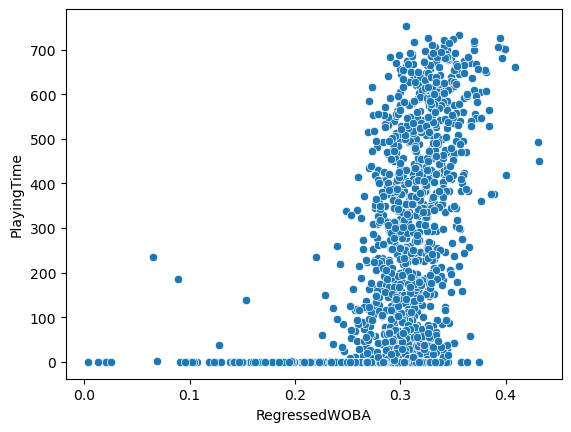

In [21]:
import seaborn as sns
cmap = sns.color_palette("flare", as_cmap=True)
#sns.scatterplot(x="Age", y="PlayingTime", hue = "RegressedWOBA",palette=cmap, data = currentWOBA)
sns.scatterplot(x = "RegressedWOBA", y = "PlayingTime", data = nextyearWOBA.to_pandas())#.set_xlim(0,0.4)
#players with high and low wobas have little playing time

In [56]:
"""Modeling 
using batter as a feature - CATBOOST
GPBoost Model
PyMC Model

"""
lastyear = nextyearWOBA.with_columns(
    (pl.col("year") - 1).alias("last_year")
).select("batter", "last_year", "PlayingTime").rename({"PlayingTime": "LastYearPlayingTime"})
lastyear
nextyearWOBA = nextyearWOBA.join(lastyear, left_on = ["batter", "year"], right_on = ["batter", "last_year"])

In [ ]:
from xgboost import XGBRegressor
dummies = nextyearWOBA.select("batter").to_dummies()
dummied = pl.concat([nextyearWOBA.select('LastYearPlayingTime', 'PlayingTime', 'Age', 'RegressedWOBA', 'woba_varPerformance'), dummies], how = 'horizontal') 
xs = dummied.columns
xs.remove("PlayingTime")
xs
#model = CatBoostClassifier(iterations=1000,         # Number of boosting iterations
#                            learning_rate=0.03,     # Learning rate
#                            depth=6,                # Depth of the trees
#                            verbose=200)   
test_model_sklearn(XGBRegressor(), nextyearWOBA.to_pandas(), ['LastYearPlayingTime', 'Age', 'RegressedWOBA'], ['PlayingTime'])
#yeah dummied will not cut it I think - seems to add more
#Linear Regression outperforms xgboost? - yeah pretty much

154.66298482365923

In [ ]:
batterWOBA = regressedWOBA.pivot("game_year", index = "batter", values = "RegressedWOBA").select("batter", "2021", "2022", "2023")

In [ ]:
batterDataWOBA = batterData.rename({"2021": "2021_PT", "2022": "2022_PT", "2023": "2023_PT"}).join(batterWOBA, on = "batter").rename({"2021": "2021_WOBA", "2022": "2022_WOBA", "2023": "2023_WOBA"})
#parabolic fit for age?
seasonTS = batterDataWOBA.pivot

batter,2021_PT,2022_PT,2023_PT,playerID_LAHMAN,Age2021,Age2022,Age2023,TIL2021,TIL2022,TIL2023,2021_WOBA,2022_WOBA,2023_WOBA
str,u32,u32,u32,str,u32,u32,u32,u32,u32,u32,f64,f64,f64
"""a005eb90265f5f1aab9e88a48ec4d0…",163,162,342,"""93c82ba6d9c19a4024168af4b2193e…",303,315,327,2,14,26,0.313488,0.249483,0.27826
"""0f69eb701a55b4137c4f9912a16bf5…",359,128,0,"""08a878ca35065a5353fdb640d97104…",348,360,372,64,76,88,0.322965,0.331575,null
"""cf37ddacfdbd60f20cff15e645d2e0…",1,10,0,"""4b56f66b6f8da12c49a92a93cdb031…",276,288,300,1,13,25,0.157412,0.302545,null
"""4600b4d76c203bfa61c16bee1e87c5…",154,0,0,"""377efd6a784fcb50f76d30bc9760b0…",329,341,353,73,85,97,0.261668,null,null
"""37bfaeb9268f9389dfa6157b48b8c7…",444,667,663,"""8aaa128a4fd2e21b111d6a1b5110c1…",366,378,390,84,96,108,0.311258,0.356557,0.33871
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""3c8235024a0e3e3f1dcfef16080eaa…",26,0,0,"""c76bfbc83462f3bcd0f91a474bcb5f…",311,323,335,49,61,73,0.340918,null,null
"""3142966391d5752fe8f2c279e019bf…",122,0,0,"""e549c7d61868d67f3ebbfafcf3257f…",313,325,337,28,40,52,0.258116,null,null
"""5ff4ced80a4fae6654ff7b423fd5ba…",1,0,0,"""f908b84668079ec2a4ad18b492e88b…",333,345,357,1,13,25,0.167412,null,null


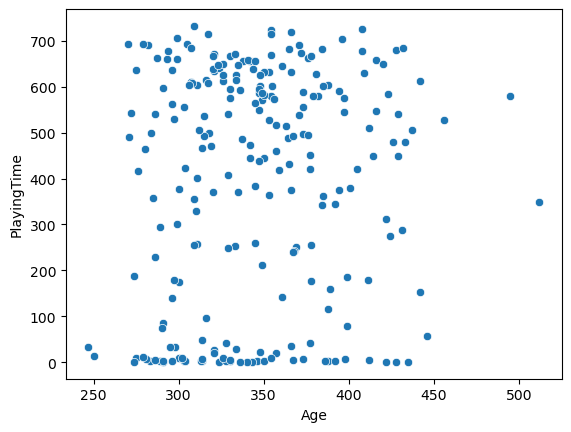

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def fitCurve(filter):
    if batter:
        batterdf = currentWOBA.filter(filter)
    if batterdf.shape[0] == 1:
        return "Only one point"
    #sns.regplot(x='Age', y='PlayingTime', data=batterdf.head(2), ci = False, scatter= False).set_title(f"batter id: {batter}")
    sns.scatterplot(data=batterdf, x='Age', y='PlayingTime')
iter = 20
filter = pl.col("RegressedWOBA") > 0.35
#list(currentWOBA.group_by("batter").len().filter(pl.col("len") == 3).get_column("batter"))[iter]
fitCurve(filter)#not always linear! - need to use nonlinear approaches - somewhat good interpolation

In [281]:
#not always linear! - need to use nonlinear approaches
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('batter_analysis.pdf') as pdf:
    batter_list = list(currentWOBA.group_by("batter").len().filter(pl.col("len") == 3).get_column("batter"))
    for i in range(len(batter_list)): 
        print(batter_list[i])
        plt.figure()  
        fitCurve(batter_list[i])
        pdf.savefig() 
        plt.close()  

a9b53974ac34cd7c03133051645ef424e81c3073
ccbeebb83e2f368d70aca48df9d3cab30efa80cf
726f300105ad69d160d0835fbbaaa4dabd7d7d39
705bd2962c69a2d18c196329eb7167125e3c1e06
24fa12505cdc29d6c15f5e6c08e00f1c42e4373f
e4ba6c019866c79d03d1e1be7e49acc9453ccf99
0dd87d3394b8e4828b192487a4d747744bc39cf4
b6a6add81b3c0c558430e20f668a39790058918d
74fbd2c42d3848988ba22644a52c38a95f26283b
9913abc66fc538f252a1e2fa25f2a4ed7281f71d
fa024bd05ae46a00b122ece10199c6cb2b0efbfe
c008321df24d751dddfe7f58ba933bb426f4bbaf
a2492466d4a5ab3f0b605db3ce867e966f605a0d
de04a3db23231866d64b7e4a0c6fe5bfda2447d7
786672c08d33f1282d91da2df59542edc3219d39
58bd390684a1b46fc0f2df6e75a8c563593e307e
1ccfa4a1ec1b4a6fca216a1e270f6183505fe38c
414d21ef2332a57d42fc40c9aff480652823df54
deb7b468a91c97b3c1b2c019c08913d7aed65774
a1639e7871881ef53f45c5a8c8e5a4d42dc73347
19f683ce76088d78377da48963e1c90cbac9ffaa
1a35380236861a3e9242fc1790692a52ca977c92
cd008120919654d8408cbea3cf6b8908bf57dd02
83b0284261e2bda954f2c6b2dc67c2a5e4f3c127
637aa60cb3c5b707